<a href="https://colab.research.google.com/github/Amanda-Torres/SistemaDeRecomendacao/blob/main/ML_Recomenda%C3%A7%C3%A3oDeFilmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapa 1: Escolha do problema

Optamos por abordar a personalização de recomendações em plataformas de streaming de filmes. As plataformas de streaming enfrentam o desafio constante de oferecer aos usuários recomendações relevantes, que os levem a descobrir novos conteúdos e a terem uma experiência mais personalizada.

Em nosso sistema optamos por utilizar uma abordagem de ***filtragem colaborativa***: Uma técnica amplamente usada em sistemas de recomendação para prever as preferências ou interesses de um usuário com base nas opiniões ou comportamentos de usuários semelhantes.

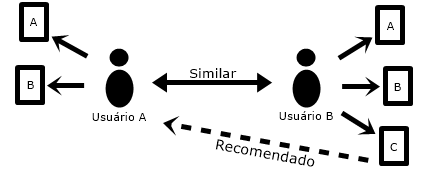


# Etapa 2: Coleta de Dados



Os dados utilizados nesse projeto foram obtidos do conjunto de dados do MovieLens, especificamente o subconjunto ml-latest-small. Este conjunto de dados utiliza dados reais, coletados de usuários do MovieLens ao longo do tempo. São dados públicos e estão disponíveis para download no site do GroupLens. Não há informações pessoais identificáveis, portanto, não há preocupações com a privacidade.

In [ ]:
#importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors, KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error

In [ ]:
# Importando dados
ratings = pd.read_csv('https://raw.githubusercontent.com/Amanda-Torres/SistemaDeRecomendacao/main/DataSet/ratings.csv')
movies = pd.read_csv('https://raw.githubusercontent.com/Amanda-Torres/SistemaDeRecomendacao/main/DataSet/movies.csv')

# Etapa 3: Preparação de Dados

### Análise do DataFrame movies:

In [ ]:
# Tamanho do DataFrame
print(movies.shape)

(9742, 3)


In [ ]:
# Primeiras e últimas linhas do DataFrame
display(movies)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
# Verificando os tipos de dados
movies.dtypes

movieId     int64
title      object
genres     object
dtype: object

In [ ]:
# Análise dos gêneros
print(movies['genres'].value_counts())

genres
Drama                                                  1053
Comedy                                                  946
Comedy|Drama                                            435
Comedy|Romance                                          363
Drama|Romance                                           349
                                                       ... 
Action|Crime|Horror|Mystery|Thriller                      1
Adventure|Animation|Children|Comedy|Musical|Romance       1
Action|Adventure|Animation|Comedy|Crime|Mystery           1
Children|Comedy|Fantasy|Sci-Fi                            1
Action|Animation|Comedy|Fantasy                           1
Name: count, Length: 951, dtype: int64


In [ ]:
# Verificando se possui valores ausentes
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

**Conclusões:**


* Possui 9.742 filmes.
* Estão distribuidos em 3 colunas sendo elas : movieId, title e genres.
* Os tipos de dados são: movieId = int, title e genres = object.
* Os generos mais frequentes são: Drama, Comédia, Thriller, Ação e Romance.
* Nenhum valor ausente foi encontrado.



### Análise do DataFrame ratings:

In [ ]:
# Tamanho do DataFrame
print(ratings.shape)

(100836, 4)


In [ ]:
# Primeiras e últimas linhas do DataFrame
display(ratings)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [ ]:
# Verificando os tipos de dados
ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [ ]:
# Descrição das avaliações
print(ratings['rating'].describe())

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


In [ ]:
# Quantidade de avaliações por usuário
print(ratings['userId'].value_counts())

userId
414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
442      20
569      20
320      20
576      20
53       20
Name: count, Length: 610, dtype: int64


In [ ]:
# Quantidade de avaliações por filme
print(ratings['movieId'].value_counts())

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
86279       1
86922       1
5962        1
87660       1
163981      1
Name: count, Length: 9724, dtype: int64


In [ ]:
# Verificando se possui valores ausentes
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

**Conclusões:**

* Possui 100.836 avaliações.
* Estão distribuidos em 4 colunas sendo elas: userId, movieId, rating e timestamp.
* Os tipos de dados são: userId, movieId timestamp = int, float = ratings.
* A média das avaliações é de 3,50 com um desvio padrão de 1,04.
* A quantidade de avaliações por usuário e por filme varia bastante.
Enquanto alguns usuários avaliaram muitos filmes, outros avaliaram poucos. O mesmo ocorre com os filmes.
* Nenhum valor ausente foi encontrado.


### Pré-Processamento dos dados:

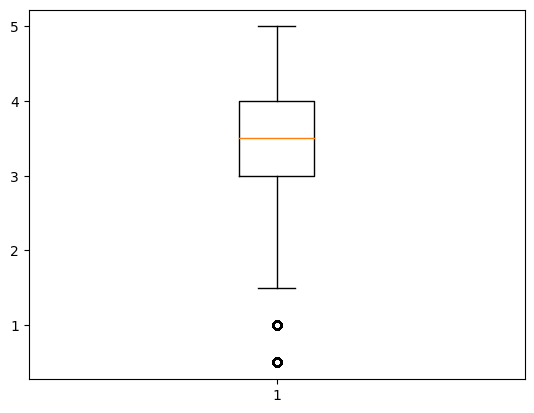

In [ ]:
# Identificação de Outliers
plt.boxplot(ratings['rating'])
plt.show()

Através de uma análise do boxplot concluimos que existem Outliers que sugerem avaliações abaixo de 1. Por se tratar de avaliações de filmes consideramos aceitavel notas a baixo de 1 e optamos por não tratar esses valores.

In [ ]:
# Juntando os dataframes
ratings_movies = pd.merge(ratings, movies, on='movieId', how='left')

In [ ]:
display(ratings_movies)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


Optamos por focar apenas em dados essenciais para o nosso sistema. Após uma análise identificamos apenas os seguintes dados como essenciais: userId, rating e title.

In [ ]:
# Excluindo colunas desnecessarias
ratings_movies = ratings_movies.drop(columns=['movieId', 'timestamp', 'genres'])

In [ ]:
display(ratings_movies)

,userId,rating,title
0,1,4.0,Toy Story (1995)
1,1,4.0,Grumpier Old Men (1995)
2,1,4.0,Heat (1995)
3,1,5.0,Seven (a.k.a. Se7en) (1995)
4,1,5.0,"Usual Suspects, The (1995)"
...,...,...,...
100831,610,4.0,Split (2017)
100832,610,5.0,John Wick: Chapter Two (2017)
100833,610,5.0,Get Out (2017)
100834,610,5.0,Logan (2017)


In [ ]:
# Criando uma tabela pivot
ratings_movies_pivot=ratings_movies.pivot_table(index='userId',columns='title',values='rating').fillna(0)
ratings_movies_pivot.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Etapa 4: Divisão de Dados

* Treinamento (70%): Permite que o modelo aprenda os padrões e conexões entre as informações disponíveis.

* Validação (15%): Usamos esse conjunto para ajustar os hiperparâmetros do modelo e para identificar qualquer sinal de sobreajuste (overfitting) aos dados de treinamento.

* Teste (15%): Depois que o modelo aprendeu e foi ajustado, usamos esses dados para ver como ele se sai em situações novas.


In [ ]:
# Dividindo os dados
X_train, X_temp, y_train, y_temp = train_test_split(ratings_movies_pivot, ratings_movies_pivot, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Criando os DataFrames
print(f'Tamanho do conjunto de treinamento: {len(X_train)}')
print(f'Tamanho do conjunto de validação: {len(X_val)}')
print(f'Tamanho do conjunto de teste: {len(X_test)}')

Tamanho do conjunto de treinamento: 427
Tamanho do conjunto de validação: 91
Tamanho do conjunto de teste: 92


# Etapa 5: Treinamento e Otimização do Modelo

Em nosso sistema optamos por utilizar o algoritmo KNN devido à sua simplicidade de compreensão e implementação, bem como sua flexibilidade e capacidade de personalização.


***Como funciona k-Nearest Neighbors (k-NN):***

O k-NN é um algoritmo simples e intuitivo que classifica um ponto de dados com base na maioria dos votos dos seus "vizinhos" mais próximos. A ideia é que pontos de dados semelhantes tendem a pertencer à mesma classe ou ter valores semelhantes.



***Como funciona o modelo:***

Utilizamos o algoritmo KNN para identificar os vizinhos mais próximos de um usuário alvo (a quem vamos recomendar filmes). Utilizamos os 10 filmes avaliados com maiores notas pelo vizinho mais próximo e que ao mesmo tempo não foram avaliados pelo usuário alvo, para assim fazer a recomendação.

***Ajuste de hiperparametros do KNN:***

Não achamos relevante no momento testar diferentes quantidade de vizinhos próximos (n_neighbors) visto que nesse modelo só iremos considerar o mais próximo para fazer a recomendação ao usuário alvo.

A métrica de similaridade (metric) que utilizamos é o cosseno(cosine), uma medida que avalia a similaridade entre dois vetores considerando o ângulo entre eles. E é amplamente utilizada em sistemas de recomendação

In [ ]:
# Treinando o modelo

num_neighbors = 3

modelo_knn = NearestNeighbors(n_neighbors=num_neighbors, metric='cosine')
modelo_knn.fit(X_train)

NearestNeighbors(metric='cosine', n_neighbors=3)

In [ ]:
# Função para recomendar filmes para um usuário
def recomendar_filmes_para_usuario(user_index, dataFrame):
    # Encontrando os vizinhos mais próximos do usuário alvo
    distances, indexes = modelo_knn.kneighbors(dataFrame.iloc[user_index].values.reshape(1, -1), n_neighbors=num_neighbors)

    userId = dataFrame.iloc[user_index].name
    print(f"Recomendando vizinhos ao usuário {userId}:\n")

    # Exibindo os vizinhos mais próximos e suas distâncias
    for i in range(1, len(distances.flatten())):
      neighbor = ratings_movies_pivot.index[indexes.flatten()[i]]
      distance = distances.flatten()[i]
      print(f"Vizinho {i}: Usuário ID {neighbor} (distância: {distance})\n")

    return userId, indexes.flatten()

In [ ]:
user_index = 5  # Exemplo de ID de usuário
userId, indexes = recomendar_filmes_para_usuario(user_index, X_test)

Recomendando vizinhos ao usuário 321:

Vizinho 1: Usuário ID 138 (distância: 0.38392619998570754)

Vizinho 2: Usuário ID 268 (distância: 0.4091886976658259)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [ ]:
# Criando tabelas para o usuário alvo e o vizinho mais próximo
ds_user = ratings_movies_pivot.loc[userId].to_frame()

# Selecionando o primeiro vizinho mais próximo
closest_neighbor_index = indexes[1]

closest_neighbor = ratings_movies_pivot.index[closest_neighbor_index]
ds_neighbors = ratings_movies_pivot.loc[closest_neighbor].to_frame()

# Juntando as tabelas
ds_titles = pd.merge(ds_user, ds_neighbors, on='title').sort_values(by=closest_neighbor, ascending=False)

# Exibindo títulos que o usuário mais próximo avaliou e o usuário alvo não assistiu
ds_titles = ds_titles[(ds_titles[closest_neighbor] > 0) & (ds_titles[userId] == 0)].reset_index()

display(ds_titles)

,title,321,138
0,Kung Fu Panda (2008),0.0,5.0
1,Circle of Friends (1995),0.0,5.0
2,"Philadelphia Story, The (1940)",0.0,5.0
3,Drunken Master (Jui kuen) (1978),0.0,5.0
4,"Legend of Drunken Master, The (Jui kuen II) (1...",0.0,5.0
5,"Crouching Tiger, Hidden Dragon (Wo hu cang lon...",0.0,5.0
6,"Gods Must Be Crazy, The (1980)",0.0,5.0
7,"20,000 Leagues Under the Sea (1954)",0.0,5.0
8,Escape from L.A. (1996),0.0,4.5
9,"Forbidden Kingdom, The (2008)",0.0,4.5


In [ ]:
# Exibindo recomendações
print("Top 10 Filmes Recomendados:\n")
for i, title in enumerate(ds_titles.title[:10], 1):
    print(f"{i}. {title}")
print("\n" + "="*35 + "\n")

Top 10 Filmes Recomendados:

1. Kung Fu Panda (2008)
2. Circle of Friends (1995)
3. Philadelphia Story, The (1940)
4. Drunken Master (Jui kuen) (1978)
5. Legend of Drunken Master, The (Jui kuen II) (1994)
6. Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)
7. Gods Must Be Crazy, The (1980)
8. 20,000 Leagues Under the Sea (1954)
9. Escape from L.A. (1996)
10. Forbidden Kingdom, The (2008)




# Etapa 6: Análise / Avaliação

### ***Avaliando o modelo***

***RMSE  (Root Mean Squared Error)*** fornece uma medida da dispersão dos erros do modelo em relação aos valores reais. Quanto menor o RMSE, melhor o desempenho do modelo, pois isso indica que as previsões do modelo estão, em média, mais próximas dos valores reais.

In [ ]:
# Instanciando e treinando o modelo KNN como regressor
modelo_knn_reg = KNeighborsRegressor()
modelo_knn_reg.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_reg = modelo_knn_reg.predict(X_test)

# Calculando o RMSE
rmse = mean_squared_error(y_test, y_pred_reg, squared=False)
print("RMSE:", rmse)

RMSE: 0.3087933686188981


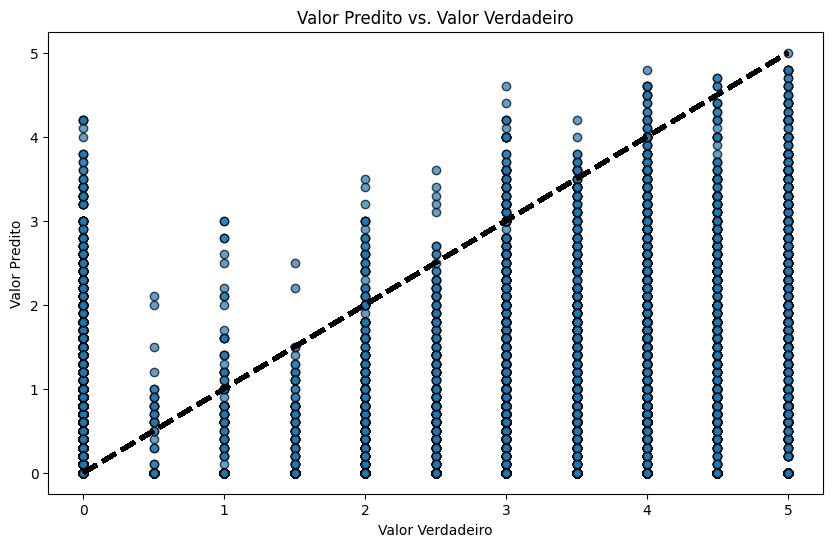

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_reg, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Valor Verdadeiro')
plt.ylabel('Valor Predito')
plt.title('Valor Predito vs. Valor Verdadeiro')
plt.show()

Esse gráfico é usado para avaliar o desempenho do sistema de recomendação. Quanto mais próximos os pontos estiverem da linha de tendência, melhor é a precisão do modelo.

Neste caso, a maioria dos pontos estão próximos da linha de tendência, indicando um desempenho geral positivo do sistema. No entanto, o gráfico também revela que o sistema tem mais dificuldade em prever com precisão para os usuários com poucas avaliações.

Sendo assim o mesmo é diretamente afetado pela quantidade de avaliações que o usuário possui. Trazendo recomendações melhores e mais assertivas para usuários que avaliam mais, uma vez que tem mais conteúdo para comparar com vizinhos (usuários similares).

### ***Estimando custo de treinamento e inferência***


Para estimar os custo de treinamento e inferência do nosso sistema de recomendação de filmes considerar alguns pontos:

**Tamanho do Conjunto de Dados:**

*   **Tamanho do Conjunto de Dados:** O conjunto de dados é relativamente pequeno, o que é bom em termos de custo computacional.
*   **Complexidade Computacional do k-NN:** O algoritmo de ML é simples, porém o custo computacional do treinamento e da inferência depende do número de vizinhos (k) e da dimensionalidade dos dados. No caso desse sistema o número de vizinhos analisados é 2, o que reduz a quantidade de cálculos necessários.
*   **Treinamento:** Para o "treinamento" é rápido, pois o algoritmo armazena apenas os dados de treinamento.
*   **Inferência:** A fase de inferência, no entanto, pode ser mais custosa computacionalmente, pois para cada nova consulta (usuário), o algoritmo precisa calcular as distâncias entre esse ponto e todos os outros pontos no conjunto de dados.

Dado o tamanho relativamente pequeno do conjunto de dados, o custo de treinamento e inferência do k-NN para esse caso específico deve ser relativamente baixo. No entanto, o custo real depende de fatores como a implementação específica do algoritmo, a eficiência das operações de cálculo de distância e o hardware utilizado.